In [1]:
from autograph import autograph
import matplotlib.pyplot as plt

def draw_adjacency_matrix(
    graph: autograph.KnowledgeGraph,
    title: str
):
    matrix = graph.as_matrix()
    plt.imshow(matrix, cmap="Greys", interpolation="none")
    plt.title(title)
    plt.show()

Added scale free clusters
Added links


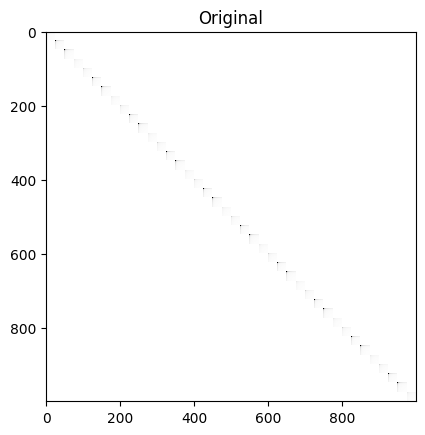

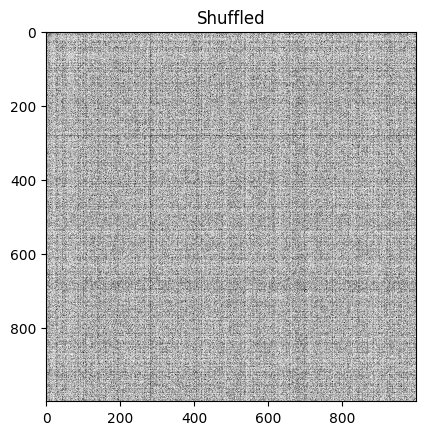

Clustering
Running on 0..400000
Cluster list: [Cluster { cluster_type: Strong, range: 0..9995 }, Cluster { cluster_type: Border, range: 9995..11848 }, Cluster { cluster_type: Strong, range: 11848..29993 }, Cluster { cluster_type: Border, range: 29993..30141 }, Cluster { cluster_type: Strong, range: 30141..40188 }, Cluster { cluster_type: Border, range: 40188..41825 }, Cluster { cluster_type: Strong, range: 41825..42140 }, Cluster { cluster_type: Border, range: 42140..42141 }, Cluster { cluster_type: Strong, range: 42141..52009 }, Cluster { cluster_type: Border, range: 52009..54348 }, Cluster { cluster_type: Strong, range: 54348..54707 }, Cluster { cluster_type: Border, range: 54707..55461 }, Cluster { cluster_type: Strong, range: 55461..55761 }, Cluster { cluster_type: Border, range: 55761..58097 }, Cluster { cluster_type: Strong, range: 58097..58896 }, Cluster { cluster_type: Border, range: 58896..59394 }, Cluster { cluster_type: Strong, range: 59394..59779 }, Cluster { cluster_type: 

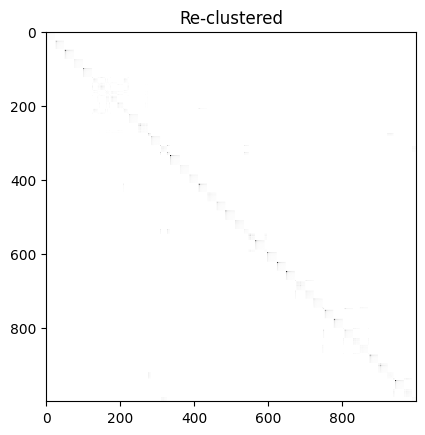

Cluster time: 653.058s
[(0, 10000), (10000, 20000), (20000, 30000), (30000, 40028), (40028, 50030), (50030, 51225), (51225, 54172), (54172, 54552), (54552, 55839), (55839, 56253), (56253, 56712), (56712, 57820), (57820, 58169), (58169, 58747), (58747, 63920), (63920, 64563), (64563, 64932), (64932, 65445), (65445, 65886), (65886, 66388), (66388, 66676), (66676, 67860), (67860, 69210), (69210, 69903), (69903, 76944), (76944, 83664), (83664, 83926), (83926, 88238), (88238, 88593), (88593, 89227), (89227, 89542), (89542, 99234), (99234, 99605), (99605, 107447), (107447, 107812), (107812, 108998), (108998, 109422), (109422, 109922), (109922, 110338), (110338, 113651), (113651, 123653), (123653, 124377), (124377, 124639), (124639, 130361), (130361, 134419), (134419, 144419), (144419, 154419), (154419, 164419), (164419, 174157), (174157, 174675), (174675, 184157), (184157, 194157), (194157, 204177), (204177, 214157), (214157, 219120), (219120, 219768), (219768, 220060), (220060, 224341), (22

In [2]:
import time

cluster_size = 10_000
num_clusters = 40
pepper_amount = 1_000

builder = autograph.GraphBuilder(0)
for i in range(num_clusters):
    builder.add_scale_free_cluster(cluster_size, 100)

print("Added scale free clusters", flush=True)

for _ in range(pepper_amount):
    for i in range(num_clusters):
        builder.add_random_link(i, (i + 1) % num_clusters)

print("Added links", flush=True)

graph = builder.finalize_graph()
draw_adjacency_matrix(graph, "Original")

graph.shuffle_vertex_ids(0)
draw_adjacency_matrix(graph, "Shuffled")

print("Clustering", flush=True)
start_time = time.time()
graph.cluster(0.01, 5, 0.1, 250)
cluster_time = time.time() - start_time

draw_adjacency_matrix(graph, "Re-clustered")
print(f"Cluster time: {cluster_time:.3f}s", flush=True)
print(graph.get_clusters())